## Introduction TODO
Give an overview of correlation between GPA and success - earnings after college, etc use studies

Talk about potential biases and other factors that can’t be controlled necessarily that are important to keep in mind - professor, course rigor, student background, personal motivation, term the class was taken, spring for 2023-2024 has not concluded yet so we only have Fall data so far for this year

## Data Loading
This cell imports necessary libraries for data manipulation and visualization, then loads various datasets representing GPA distributions from 2016 to 2024 for the entire university and specific departments like Engineering, Business, and Science.

In [1]:
import pandas as pd

all_data_2016_2024 = pd.read_csv('2016-2024_Dist.csv')
engineering_data_2016_2024 = pd.read_csv('2016-2024_Engineering_Dist.csv')
business_data_2016_2024 = pd.read_csv('2016-2024_Business_Dist.csv')
science_data_2016_2024 = pd.read_csv('2016-2024_Science_Dist.csv')

## Statistical Analysis with ANOVA
To conduct a comprehensive analysis of GPA variances across all university departments, we applied the ANOVA test to the entire dataset. ANOVA, or Analysis of Variance, is designed to assess if there is a statistically significant difference between the means of three or more independent groups - in our scenario, the various departments of the university. This test helps us discern whether departmental affiliations impact GPA outcomes in a significant manner. A p-value below the standard threshold of 0.05 would indicate that the differences in GPA distributions among the departments are not just random fluctuations but statistically significant.

The process included grouping GPAs by their respective departments and then organizing them suitably for the ANOVA test, where each group of GPAs was treated as an independent sample. The f_oneway function from scipy.stats was used to execute the ANOVA test across these grouped GPAs.

The results were clear: an F-statistic of approximately 201.32 and a p-value of 0.0, which is so low that it rounds down to zero, demonstrate a highly significant difference in average GPAs across departments. This suggests a non-uniform distribution of GPAs, pointing to substantial variances that merit further exploration.

The ANOVA's significant findings serve as a prompt for deeper inquiries into which departments stand out from the rest and why. It could lead to uncovering relationships with course difficulty, departmental policies, or teaching methods. Identifying where these GPA differences lie is essential in any academic evaluation, especially in the context of potential grade inflation or deflation.

The F-statistic in this context compares the between-group variance, reflecting the variability of departmental mean GPAs from the overall mean GPA, to the within-group variance, which measures how individual GPAs deviate from their departmental averages. The high F-statistic observed suggests that departmental membership is a determinant factor in the GPA outcomes, signifying that the observed variance in GPAs across departments is substantial and not attributable to random chance. The negligible p-value lends further credence to these findings, affirming the need for additional investigative steps to delve into the specific nature of departmental disparities and their underlying causes.

In [2]:
from scipy import stats

# Group the dataset by 'Subject' (Department) and aggregate GPAs into lists for each department
gpa_by_dept = all_data_2016_2024.groupby('Subject')['GPA'].apply(list).values.tolist()

# Perform ANOVA test across all departments
anova_result_all = stats.f_oneway(*gpa_by_dept)

# Display the ANOVA test result
anova_result_all

F_onewayResult(statistic=201.31712634793263, pvalue=0.0)

## Trend Analysis of GPA Over Years
In this phase of the analysis, we investigate the evolution of GPA over the academic years from 2016 to 2024. This investigation is critical for understanding long-term trends in academic performance, potentially highlighting periods of grade inflation or deflation. By converting the 'Academic Year' to a numeric format and calculating the average GPA for each year, we obtain a clear, temporal overview of how GPAs have changed over time. The subsequent line plot visually represents these changes, offering an intuitive grasp of trends. A rising line might suggest grade inflation, while a declining one could indicate deflation or increased academic rigor. This temporal analysis is crucial for educational stakeholders aiming to assess the impact of policy changes, curriculum adjustments, or pedagogical strategies over the years. The visualization not only makes these trends accessible but also lays the groundwork for more detailed, year-on-year or department-specific investigations into what drives changes in GPA.

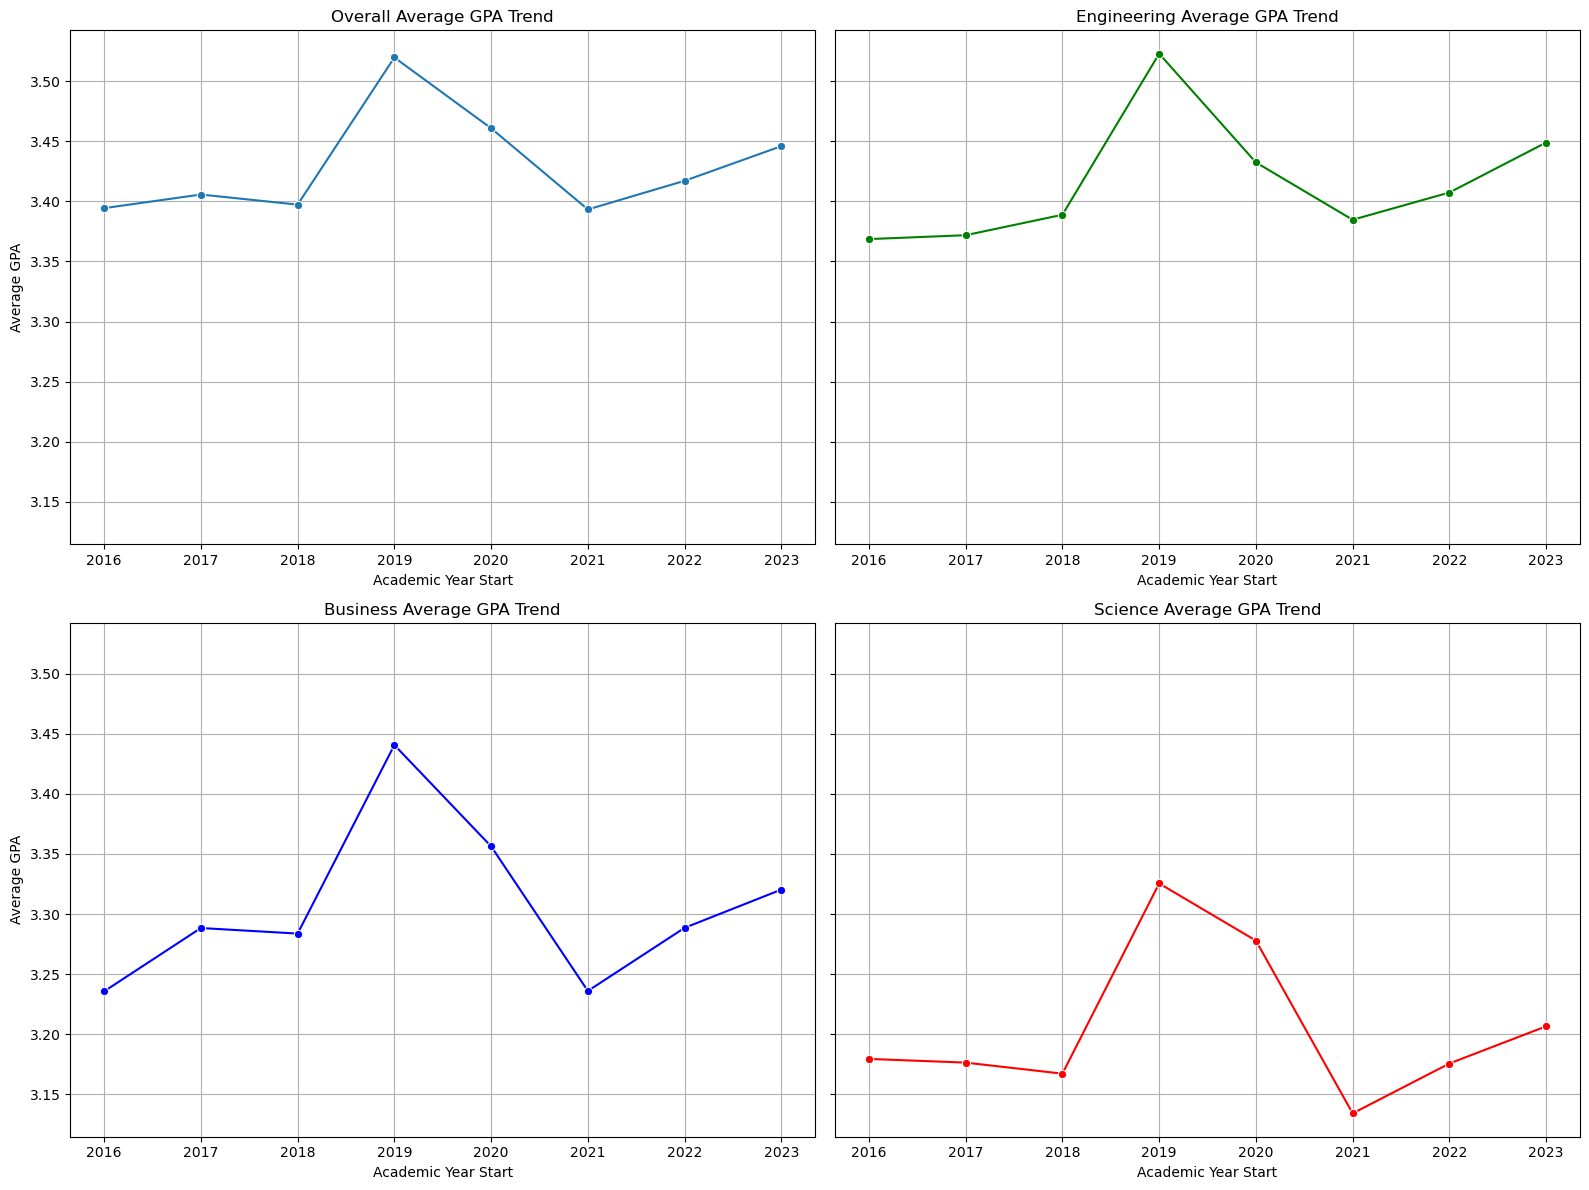

Overall Average GPA: 3.43
Engineering Average GPA: 3.41
Business Average GPA: 3.31
Science Average GPA: 3.21


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert academic year and calculate average GPA per year
def process_data(df):
    df['Year'] = df['Academic Year'].apply(lambda x: int(x.split('-')[0]))
    return df.groupby('Year')['GPA'].mean().reset_index()

# Calculate average GPA per academic year for all datasets
avg_gpa_over_years_all = process_data(all_data_2016_2024)
avg_gpa_over_years_engineering = process_data(engineering_data_2016_2024)
avg_gpa_over_years_business = process_data(business_data_2016_2024)
avg_gpa_over_years_science = process_data(science_data_2016_2024)

# Plotting in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharey=True)  # Shared y-axis for better comparison

# Overall
sns.lineplot(data=avg_gpa_over_years_all, x='Year', y='GPA', marker='o', ax=axes[0, 0])
axes[0, 0].set_title('Overall Average GPA Trend')
axes[0, 0].set_xlabel('Academic Year Start')
axes[0, 0].set_ylabel('Average GPA')

# Engineering
sns.lineplot(data=avg_gpa_over_years_engineering, x='Year', y='GPA', marker='o', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Engineering Average GPA Trend')
axes[0, 1].set_xlabel('Academic Year Start')
axes[0, 1].set_ylabel('')

# Business
sns.lineplot(data=avg_gpa_over_years_business, x='Year', y='GPA', marker='o', ax=axes[1, 0], color='blue')
axes[1, 0].set_title('Business Average GPA Trend')
axes[1, 0].set_xlabel('Academic Year Start')
axes[1, 0].set_ylabel('Average GPA')

# Science
sns.lineplot(data=avg_gpa_over_years_science, x='Year', y='GPA', marker='o', ax=axes[1, 1], color='red')
axes[1, 1].set_title('Science Average GPA Trend')
axes[1, 1].set_xlabel('Academic Year Start')
axes[1, 1].set_ylabel('')

# Set grid and adjust layout for neatness
for ax in axes.flat:
    ax.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print the overall average GPA for each college and overall
overall_avg_gpa = all_data_2016_2024['GPA'].mean()
engineering_avg_gpa = engineering_data_2016_2024['GPA'].mean()
business_avg_gpa = business_data_2016_2024['GPA'].mean()
science_avg_gpa = science_data_2016_2024['GPA'].mean()

print(f'Overall Average GPA: {overall_avg_gpa:.2f}')
print(f'Engineering Average GPA: {engineering_avg_gpa:.2f}')
print(f'Business Average GPA: {business_avg_gpa:.2f}')
print(f'Science Average GPA: {science_avg_gpa:.2f}')

## Surprising Results? TODO

Go into average gpa by department - from there narrow and filter down to subject and course level - after that show any change from then and now (older years vs past few years)
Try to find any evident patterns over the years and what it means for the foreseeable future

Find courses with lowest and highest GPAs (outliers) and how these affect the overall mean and trend. Talk about the surprising results like average gpa being so high and etc, how many courses with extremely high GPAs and how they can outweigh the ones with lower GPAs so that influences our averages, show the mean if we filter out courses that had an average GPA of 3.9 or above

## Outliers TODO
Go into average gpa by department - from there narrow and filter down to subject and course level - after that show any change from then and now (older years vs past few years)
Try to find any evident patterns over the years and what it means for the foreseeable future

Find courses with lowest and highest GPAs (outliers) and how these affect the overall mean and trend. Talk about the surprising results like average gpa being so high and etc, how many courses with extremely high GPAs and how they can outweigh the ones with lower GPAs so that influences our averages, show the mean if we filter out courses that had an average GPA of 3.9 or above

## Filtering by Course Level TODO
after removing outliers

In [4]:
# Create sets of unique subjects for each college
business_subjects = set(business_data_2016_2024['Subject'].unique())
engineering_subjects = set(engineering_data_2016_2024['Subject'].unique())
science_subjects = set(science_data_2016_2024['Subject'].unique())

# Function to map subjects to college
def map_subject_to_college(subject):
    if subject in business_subjects:
        return 'Business'
    elif subject in engineering_subjects:
        return 'Engineering'
    elif subject in science_subjects:
        return 'Science'
    else:
        return 'Other'

# Apply the function to the main dataset
all_data_2016_2024['College'] = all_data_2016_2024['Subject'].apply(map_subject_to_college)

## Machine Learning Model for GPA Prediction
This segment of the analysis leverages machine learning to predict GPA outcomes based on departmental affiliation and academic term. By employing one-hot encoding, we transform categorical variables into a numerical format that can be processed by machine learning algorithms. This preprocessing step is vital as it allows the model to interpret and learn from these categorical features effectively. A linear regression model is then trained on a subset of the data, aiming to discern patterns or relationships between the input features and GPA. The model's performance is quantitatively evaluated using the Mean Squared Error (MSE) metric, which provides a measure of the prediction accuracy by calculating the average of the squares of errors between the predicted and actual GPA values. The lower the MSE, the more accurate the model's predictions. Presenting the first few predictions alongside the MSE offers a snapshot of how well the model can estimate GPA based on the given features. This predictive modeling approach is not only valuable for understanding the influence of departmental and temporal factors on GPA but also for forecasting future GPA trends or identifying areas where interventions might be necessary to address academic performance issues.

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# One-hot encode the 'College' variable
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(all_data_2016_2024[['College']])

# Prepare features and target
x = encoded_features
y = all_data_2016_2024['GPA']

# Split the data into training and testing sets, keeping the college information
x_train, x_test, y_train, y_test, colleges_train, colleges_test = train_test_split(
    x, y, all_data_2016_2024['College'], test_size=0.2, random_state=42
)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict and evaluate the model
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)

# Print the Mean Squared Error
print(f'Mean Squared Error: {mse}')
print(f'Predictions (first 5): {predictions[:5]}')

Mean Squared Error: 0.19605906292384123
Predictions (first 5): [3.56692404 3.56692404 3.3058738  3.3058738  3.20925547]


## Visualization of Model Predictions vs. Actual GPA
This visualization is a crucial step in assessing the predictive accuracy of the machine learning model. By plotting the actual GPAs against the predicted GPAs, this scatter plot provides a visual assessment of the model's performance. The inclusion of a line representing perfect predictions (where predicted values exactly match actual values) serves as a benchmark for evaluating the model. Points that closely align with this line indicate accurate predictions, whereas deviations suggest areas where the model may be improved. This graphical representation is instrumental for identifying patterns or biases in the predictions, such as systematic overestimation or underestimation of GPA. It enables a more nuanced analysis beyond numerical metrics like MSE, offering insights into the model's behavior across different GPA ranges or academic contexts. Such visualizations are invaluable for researchers and educators alike, facilitating data-driven discussions on model efficacy, potential improvements, and implications for educational policy and practice.

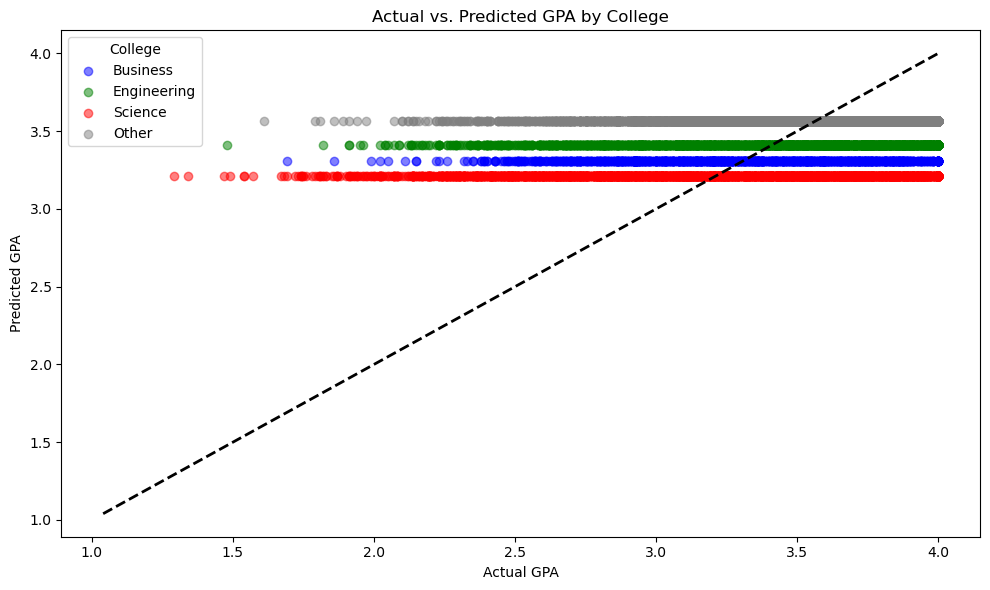

In [6]:
import matplotlib.pyplot as plt

# Create a DataFrame for plotting that includes actual, predicted GPAs, and the college category
results_df = pd.DataFrame({
    'Actual GPA': y_test,
    'Predicted GPA': predictions,
    'College': colleges_test  # Use colleges_test from the train-test split
})

# Define colors for each college
college_colors = {
    'Business': 'blue',
    'Engineering': 'green',
    'Science': 'red',
    'Other': 'gray'
}

# Scatter plot of actual vs predicted values, color-coded by college
plt.figure(figsize=(10, 6))
for college, color in college_colors.items():
    subset = results_df[results_df['College'] == college]
    plt.scatter(subset['Actual GPA'], subset['Predicted GPA'], color=color, alpha=0.5, label=college)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs. Predicted GPA by College')
plt.legend(title='College')
plt.tight_layout()
plt.show()

## Conclusion
Give a vague conclusion about how we can’t really tell for sure whether GPA correlates to success, we can use the data to help us figure out trends blah blah blah